In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Importing data

In [2]:
data = pd.read_csv('C:/Users/Lenovo/Desktop/Ram_Perceptrons/Trial/adult.csv')
data.head(50)

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital- gain,Capital-loss,Hours per wek,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         30725 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-num     32561 non-null int64
Marital status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital- gain     32561 non-null int64
Capital-loss      32561 non-null int64
Hours per wek     32561 non-null int64
Native country    31978 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Missing value imputation. I have filled using forward fill because there are around 4000 missing values.

In [4]:
data=data.fillna(method='ffill')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-num     32561 non-null int64
Marital status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital- gain     32561 non-null int64
Capital-loss      32561 non-null int64
Hours per wek     32561 non-null int64
Native country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Data preprocessing

In [6]:
data['Income']=pd.get_dummies(data['Income'],drop_first=True)
data['Sex']=pd.get_dummies(data['Sex'],drop_first=True)
data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital- gain,Capital-loss,Hours per wek,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


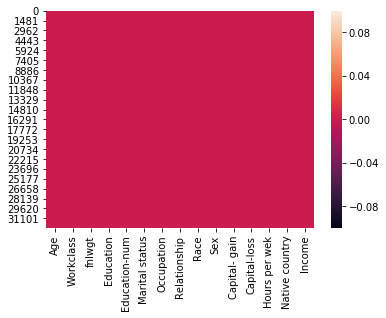

In [7]:
sb.heatmap(data.isnull())

## Converting all categorical data to binary digits

In [8]:
workclass=pd.get_dummies(data['Workclass'],drop_first=True)
education=pd.get_dummies(data['Education'],drop_first=True)
occupation=pd.get_dummies(data['Occupation'],drop_first=True)
country=pd.get_dummies(data['Native country'],drop_first=True)

In [9]:
data=data.drop(['Workclass','Education','Marital status','Occupation','Relationship','Race','Native country'],axis=1)
data=pd.concat([data,workclass,education,occupation,country],axis=1)
data.head()

,Age,fnlwgt,Education-num,Sex,Capital- gain,Capital-loss,Hours per wek,Income,Local-gov,Never-worked,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,77516,13,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Dependent and Independent variables

In [10]:
X=data.drop('Income',axis=1).values
y=data['Income'].values

## Train test split

In [11]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Gradient boosting

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rate=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for learning_rate in learning_rate:
    gb=GradientBoostingClassifier(n_estimators=20,learning_rate=learning_rate,random_state=0)
    gb.fit(X_train,y_train)
    print('Learning rate: ',learning_rate)
    print('Accuracy score(training): {0:.3f}'.format(gb.score(X_train,y_train)))
    print('Accuracy score(validation): {0:.3f}'.format(gb.score(X_test,y_test)))

Learning rate:  0.05
Accuracy score(training): 0.813
Accuracy score(validation): 0.806
Learning rate:  0.1
Accuracy score(training): 0.835
Accuracy score(validation): 0.829
Learning rate:  0.2
Accuracy score(training): 0.848
Accuracy score(validation): 0.842
Learning rate:  0.3
Accuracy score(training): 0.852
Accuracy score(validation): 0.846
Learning rate:  0.4
Accuracy score(training): 0.854
Accuracy score(validation): 0.848
Learning rate:  0.5
Accuracy score(training): 0.858
Accuracy score(validation): 0.852
Learning rate:  0.6
Accuracy score(training): 0.858
Accuracy score(validation): 0.850
Learning rate:  0.7
Accuracy score(training): 0.859
Accuracy score(validation): 0.849
Learning rate:  0.8
Accuracy score(training): 0.859
Accuracy score(validation): 0.849
Learning rate:  0.9
Accuracy score(training): 0.861
Accuracy score(validation): 0.852
Learning rate:  1.0
Accuracy score(training): 0.861
Accuracy score(validation): 0.849


In [13]:
boost=GradientBoostingClassifier(learning_rate=0.9,random_state=0)
boost.fit(X_train,y_train)
y_pred=boost.predict(X_test)
boost.score(X_test,y_test)

0.844925533548288

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4918
           1       0.74      0.57      0.64      1595

   micro avg       0.84      0.84      0.84      6513
   macro avg       0.80      0.75      0.77      6513
weighted avg       0.84      0.84      0.84      6513



array([[4595,  323],
       [ 687,  908]], dtype=int64)

## ROC curve

In [15]:
from sklearn.metrics import roc_auc_score,roc_curve
auc=roc_auc_score(y_test,y_pred)
auc

0.7518009461755869

In [16]:
probs=boost.predict_proba(X_test)
probs=probs[:,1]
def roc(fpr,tpr):
    plt.plot(fpr,tpr,color='red')
    plt.plot([0,1],[0,1],color='orange',linestyle='--')

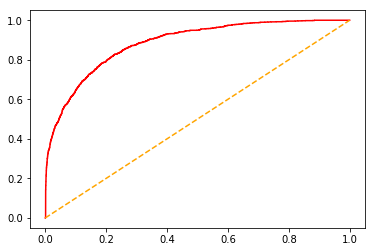

In [17]:
fpr,tpr,threshold=roc_curve(y_test,probs)
roc(fpr,tpr)